# Customer Segmentation Analysis (K-Means)

In [20]:
# Importing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
# Display first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Display shape of the data
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Age'>

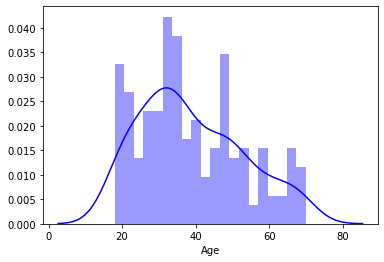

In [8]:
# Plot distributions
sns.distplot(df['Age'],bins=20, color='blue' )

<AxesSubplot:xlabel='Annual Income (k$)'>

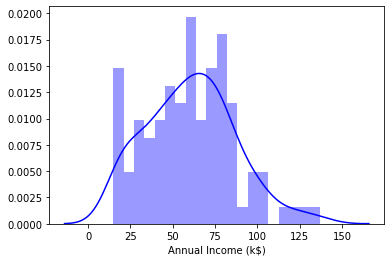

In [9]:
sns.distplot(df['Annual Income (k$)'],bins=20, color='blue' )

<AxesSubplot:xlabel='Spending Score (1-100)'>

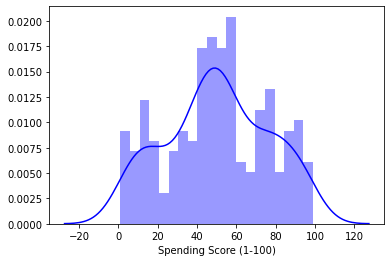

In [10]:
sns.distplot(df['Spending Score (1-100)'],bins=20, color='blue')

<AxesSubplot:xlabel='Gender', ylabel='count'>

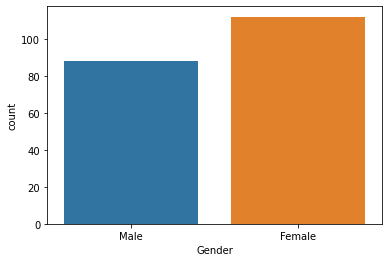

In [11]:
# countplot for gender
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

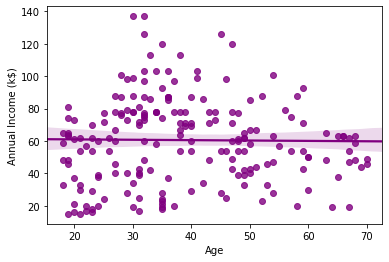

In [12]:
# Regression plot
sns.regplot(x='Age', y='Annual Income (k$)', data=df, color='purple')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

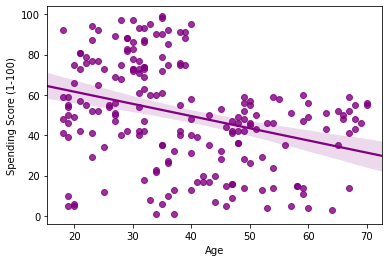

In [13]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, color='purple')

In [14]:
X=df.iloc[:, [3,4]].values

In [15]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing the number of cluster

In [16]:
# WCSS--> Within Cluster Sum of Squares
wcss=[]
for i in range (1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

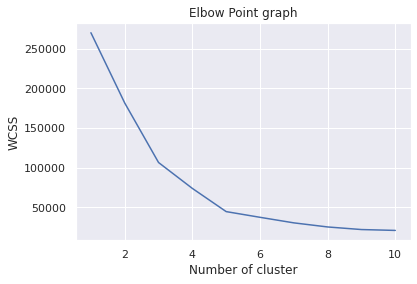

In [17]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point graph')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

## Optimum numbers of clusters are 5

In [18]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0, 0.5, 'Spending Score')

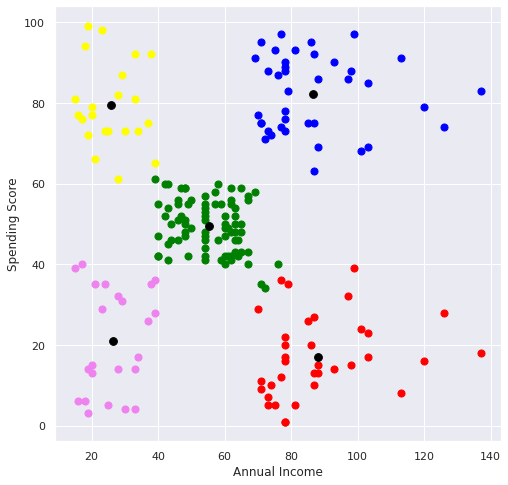

In [19]:
# Plot the clusters

plt.figure(figsize=(8, 8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c='red')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c='green')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c='blue')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c='yellow')
plt.scatter(X[Y==4, 0], X[Y==4, 1], s=50, c='violet')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')